<a href="https://colab.research.google.com/github/Dmthakkar/CoreJava/blob/master/assessment/OptusU_Final_Assessment_TermDeposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The classification goal is to predict if the client will subscribe a term deposit

> Indented block


In this notebook, we use supervised machine learning algorithms to solve a  classification type prediction problem, with two classes. The dataset is on bank term deposit attrition, where we will try to predict if deposit is Yes or No, using many input variables.

## Importing libraries



Libraries are a collection of shared files (or modules) that contain functions for use by multiples programs. These allow for common functionality to be written once and repurposed as required. 

The Python [standard library](https://docs.python.org/3/library/) contains an extensive suite of modules that are built into Python by default. For additional functionality libraries are available from [PyPI](https://pypi.org/) (the Python Package Index).

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The following two commands ignore some warnings which are generally thrown due to version updates.
import warnings
warnings.filterwarnings("ignore")

# Ex: import numpy library (as a given short name) / Here we import the entire library (called alias)
import numpy as np # Used for scientific computing and efficient multi dimensional array processing
import pandas as pd # Used for data analysis and manipulation - data frames

# Modelling utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# For Modelling 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Explainability and visualisation libraries
from xgboost import plot_tree
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
# install shap explainability
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 6.9 MB/s 


It is possible that some of the libraries that you are looking import are not available in Google Colaboratory by default. In order to provision the library in the environment you can install the library using the following command.

* Installing python libraries : ```!pip install {library_name}```
* Installing system packages : ```!apt-get install {package_name}```

[reference](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb)

## Load the dataset

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# These are the file IDs of the data sets
dataset_one_file_id = '1uAz9Y9t9apHhqZBzmxMUx5nyDx0V0agZ'

# Download the file from Google Drive
downloaded = drive.CreateFile({'id':dataset_one_file_id})
downloaded.GetContentFile('bank-term-deposit.csv')

In [4]:
#Load the CSV file containing the dataset.
bank_dataset = pd.read_csv("bank-term-deposit.csv")
# find out the dimensionality of the dataframe i.e. (rows, columns) 
print(bank_dataset.shape)
#Preview the first 5 lines of the loaded data
bank_dataset.head()

#(41188, 21)

(41188, 21)


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

## Impute missing values

In [5]:
# trim any whitespace in the dataframe using a lambda function to take each element which is a string and strip out any leading trailing spaces.
bank_dataset = bank_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# replace any blanks with NaN for consistency.
bank_dataset.replace('', np.NaN, inplace=True)
# use the isna() function to find and sum all the blank rows by each column of the dataframe.
print(bank_dataset.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


## Data exploration

In [6]:
#view data types
bank_dataset.info()
#view basic stats
bank_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

#### Target variable

Visualise the distribution of the target variable i.e. *Y* this is a binary value. Here we can already see this is an imbalanced dataset. 

In [7]:
#let's check if the dataset is imbalanced
print(bank_dataset['y'].value_counts())
print(bank_dataset['y'].value_counts(normalize=True) * 100)

no     36548
yes     4640
Name: y, dtype: int64
no     88.734583
yes    11.265417
Name: y, dtype: float64


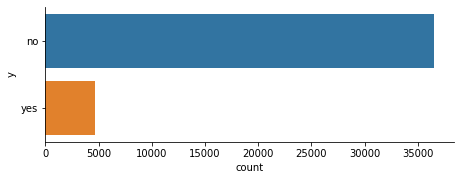

In [8]:
ax = sns.catplot(y="y", kind="count", data=bank_dataset, height=2.6, aspect=2.5, orient='h')

#### Analysis of Numerical Inputs

For numerical input variables age,	campaign,	pdays and	previous, let's plot the probability density distribution for some indications of purchase deposite or not. Think of the kdeplot as a histogram for continuous numerical values. 

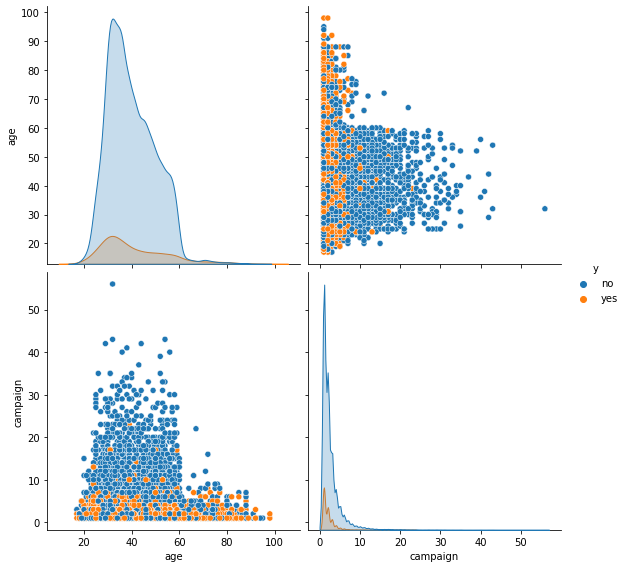

In [9]:
sns.pairplot(bank_dataset[['y', 'age',	'campaign']], hue="y", height=4)

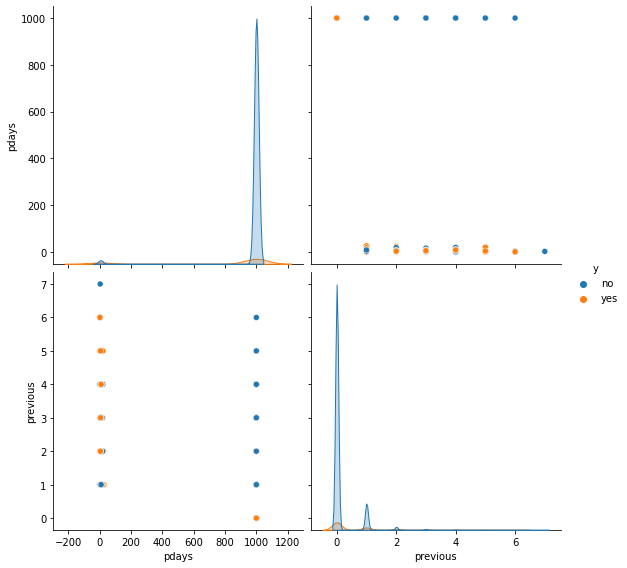

In [10]:
sns.pairplot(bank_dataset[['y', 'pdays', 'previous']], hue="y", height=4)

What are our preliminary insights? 

* age - If customer is young then it's high chance to purchase term deposit. Older customers are not much interested
* campaign - Less no of contact has high probability. 
* pdays - More no of days to contact the customer has less chance to purchase the term deposit 
* previous - Majority value is 0, it should have very less impact on the output

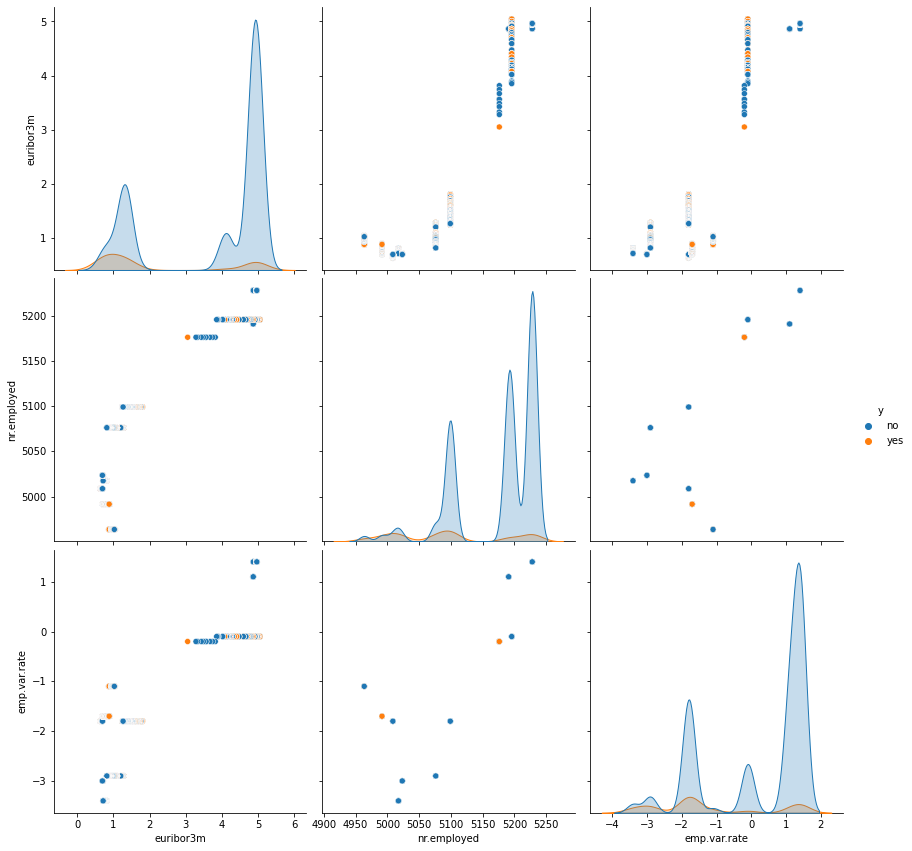

In [238]:
sns.pairplot(bank_dataset[['y', 'euribor3m', 'nr.employed', 'emp.var.rate']], hue="y", height=4)

#### Analysis of Categorical Inputs

In [11]:
def plot_categorical_features(features, title):
  fig, axs = plt.subplots(ncols=2,
                          nrows=int(len(features) / 2) + len(features) % 2)
  fig.set_size_inches(20, 10)

  row = col = 0

  for feature in features:
    plot_title = '{} - {}'.format(title, feature)
    sns.countplot(x=feature, hue="y", data=bank_dataset, ax=axs[row][col]).set_title(plot_title)

    if col == 1:
      col = 0
      row += 1
    else:
      col += 1

  plt.tight_layout()

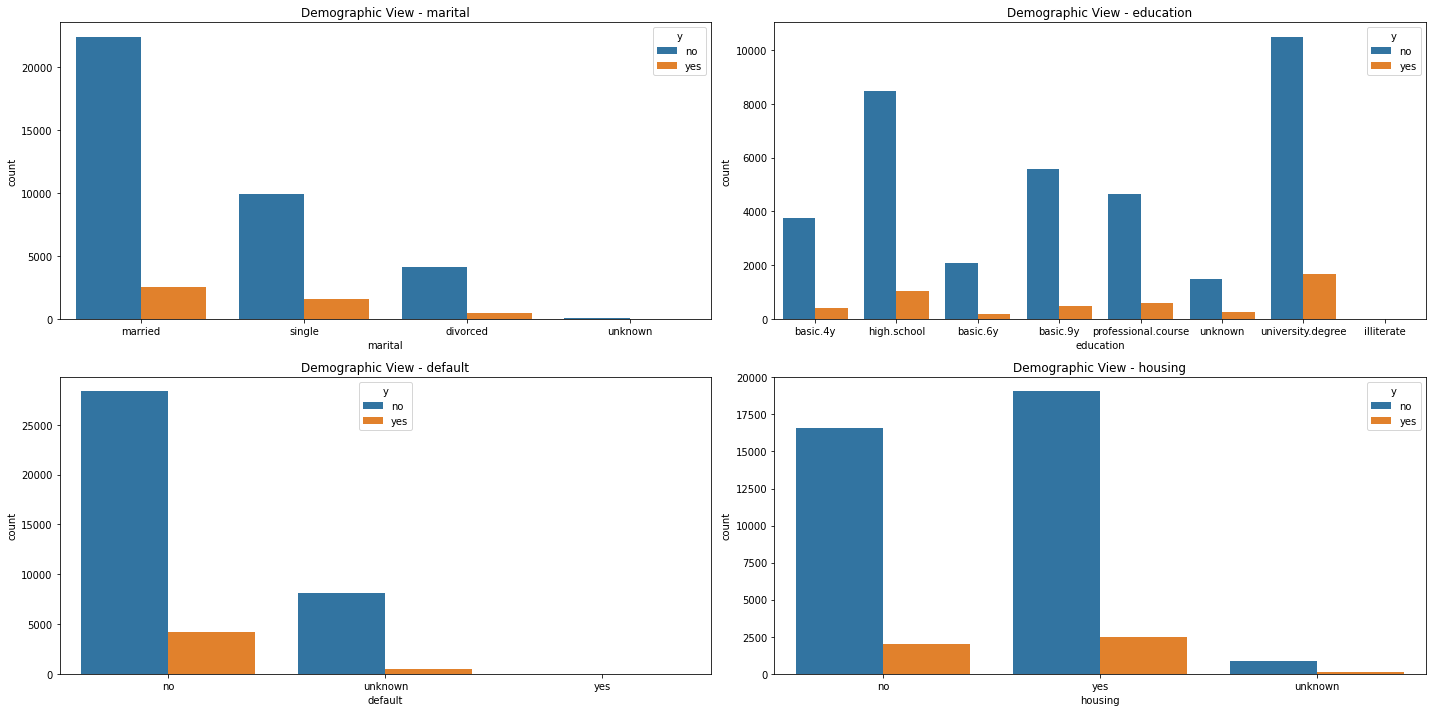

In [12]:
plot_categorical_features(['marital', 'education', 'default', 'housing'], 'Demographic View')

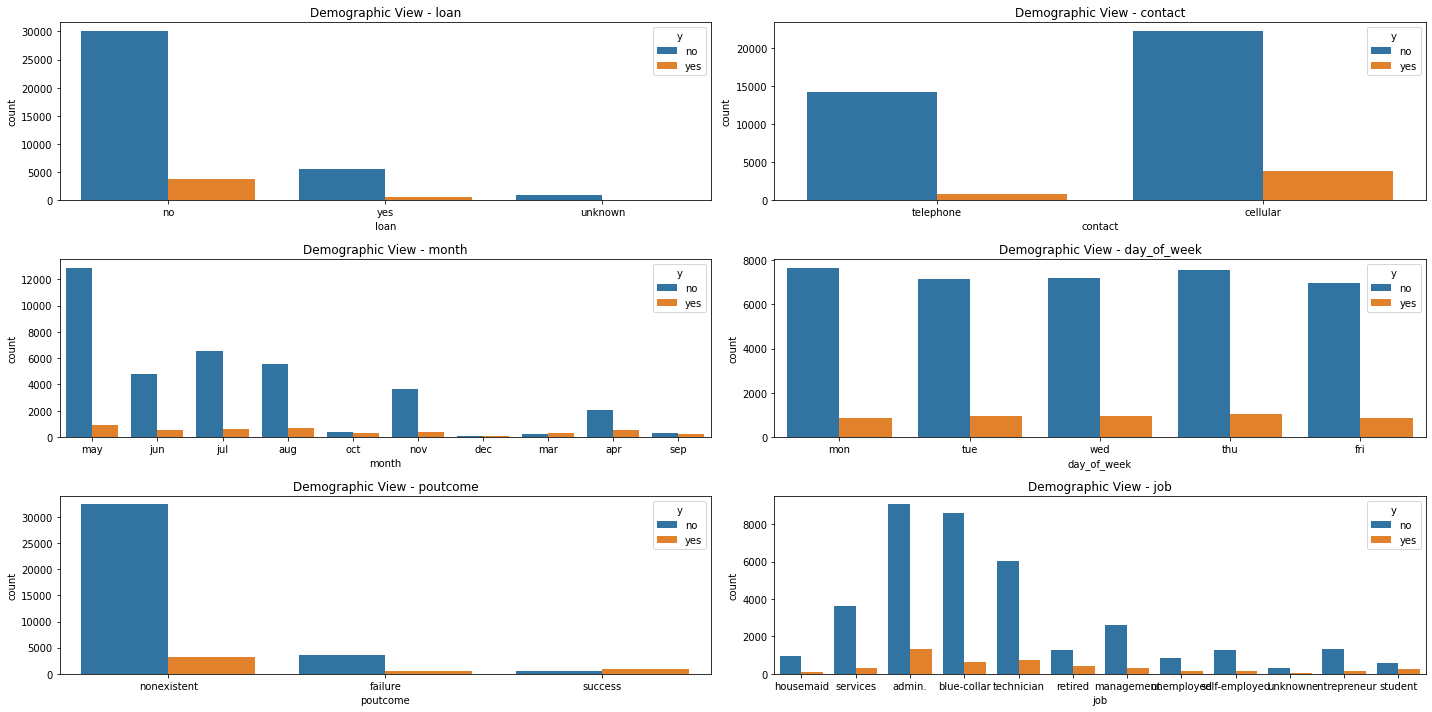

In [13]:
plot_categorical_features(['loan', 'contact', 'month', 'day_of_week','poutcome', 'job'], 'Demographic View')

## Data visualisation

#### Correlation between features

Correlation graph provides overview of feature correlation which is useful to get more insights of feature dependencies. We have replace all categorical variables before plotting the correlation matrix.

In [14]:
## There are few categorical variables that need to be preprocessed into numerical quantities that can be input to the model. 
print(bank_dataset.marital.unique())
print(bank_dataset.education.unique())
print(bank_dataset.default.unique())
print(bank_dataset.housing.unique())
print(bank_dataset.loan.unique())
print(bank_dataset.contact.unique())
print(bank_dataset.month.unique())
print(bank_dataset.day_of_week.unique())
print(bank_dataset.poutcome.unique())

['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']


In [55]:
print(bank_dataset['marital'].value_counts(normalize=True) * 100)
print(bank_dataset['education'].value_counts(normalize=True) * 100)
print(bank_dataset['default'].value_counts(normalize=True) * 100)
print(bank_dataset['housing'].value_counts(normalize=True) * 100)
print(bank_dataset['loan'].value_counts(normalize=True) * 100)
print(bank_dataset['month'].value_counts(normalize=True) * 100)
print(bank_dataset['day_of_week'].value_counts(normalize=True) * 100)
print(bank_dataset['poutcome'].value_counts(normalize=True) * 100)

married     60.640265
single      28.140508
divorced    11.219227
Name: marital, dtype: float64
university.degree      29.524667
high.school            23.112290
basic.9y               14.685706
professional.course    12.739613
basic.4y               10.144011
basic.6y                5.560961
unknown                 4.188966
illiterate              0.043787
Name: education, dtype: float64
no         79.106257
unknown    20.886445
yes         0.007298
Name: default, dtype: float64
yes        52.400993
no         45.193150
unknown     2.405858
Name: housing, dtype: float64
no         82.424346
yes        15.169797
unknown     2.405858
Name: loan, dtype: float64
may    33.414421
jul    17.429697
aug    15.004379
jun    12.907463
nov     9.959132
apr     6.395349
oct     1.739321
sep     1.386591
mar     1.320911
dec     0.442736
Name: month, dtype: float64
thu    20.918069
mon    20.665077
wed    19.752846
tue    19.653109
fri    19.010898
Name: day_of_week, dtype: float64
nonexistent    

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

<Figure size 1296x720 with 0 Axes>

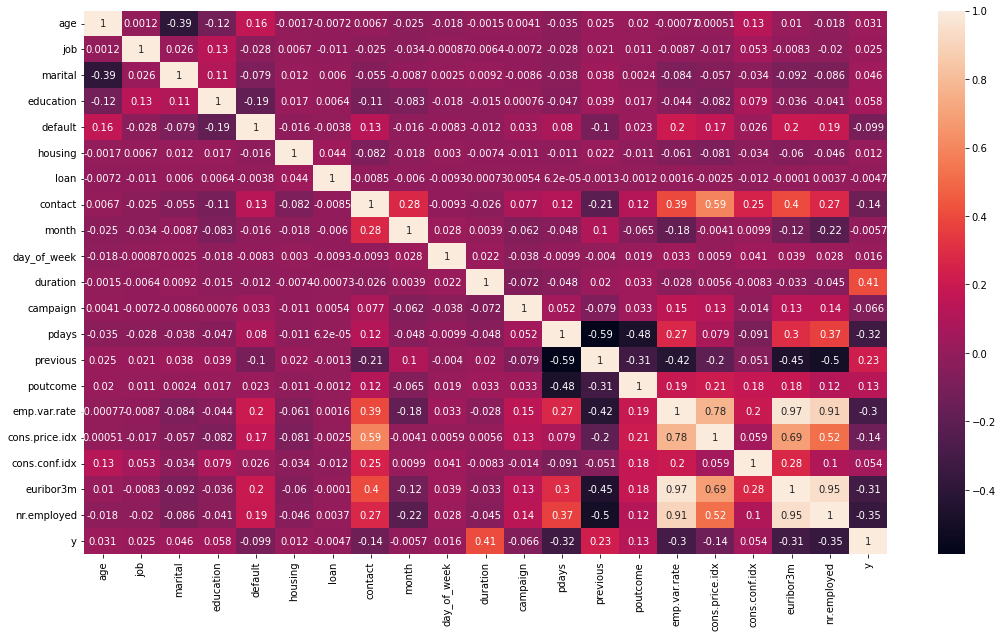

In [283]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df_bank_dataset = bank_dataset.apply(lambda x: object_to_int(x))
df_bank_dataset.head()

plt.figure(figsize = (18,10))
corr_matrix = df_bank_dataset.corr()
sns.heatmap(corr_matrix, data = df_bank_dataset, annot=True)

In [214]:
#Sort correlations by the output variable "y" 
corr_matrix['y'].sort_values(ascending=True)

nr.employed      -0.354969
pdays            -0.324898
euribor3m        -0.308058
emp.var.rate     -0.298594
contact          -0.144590
cons.price.idx   -0.136033
default          -0.099196
campaign         -0.066080
month            -0.005731
loan             -0.004729
housing           0.011672
day_of_week       0.015921
job               0.025092
age               0.030524
marital           0.045975
cons.conf.idx     0.054202
education         0.057679
poutcome          0.129500
previous          0.230130
duration          0.405089
y                 1.000000
Name: y, dtype: float64

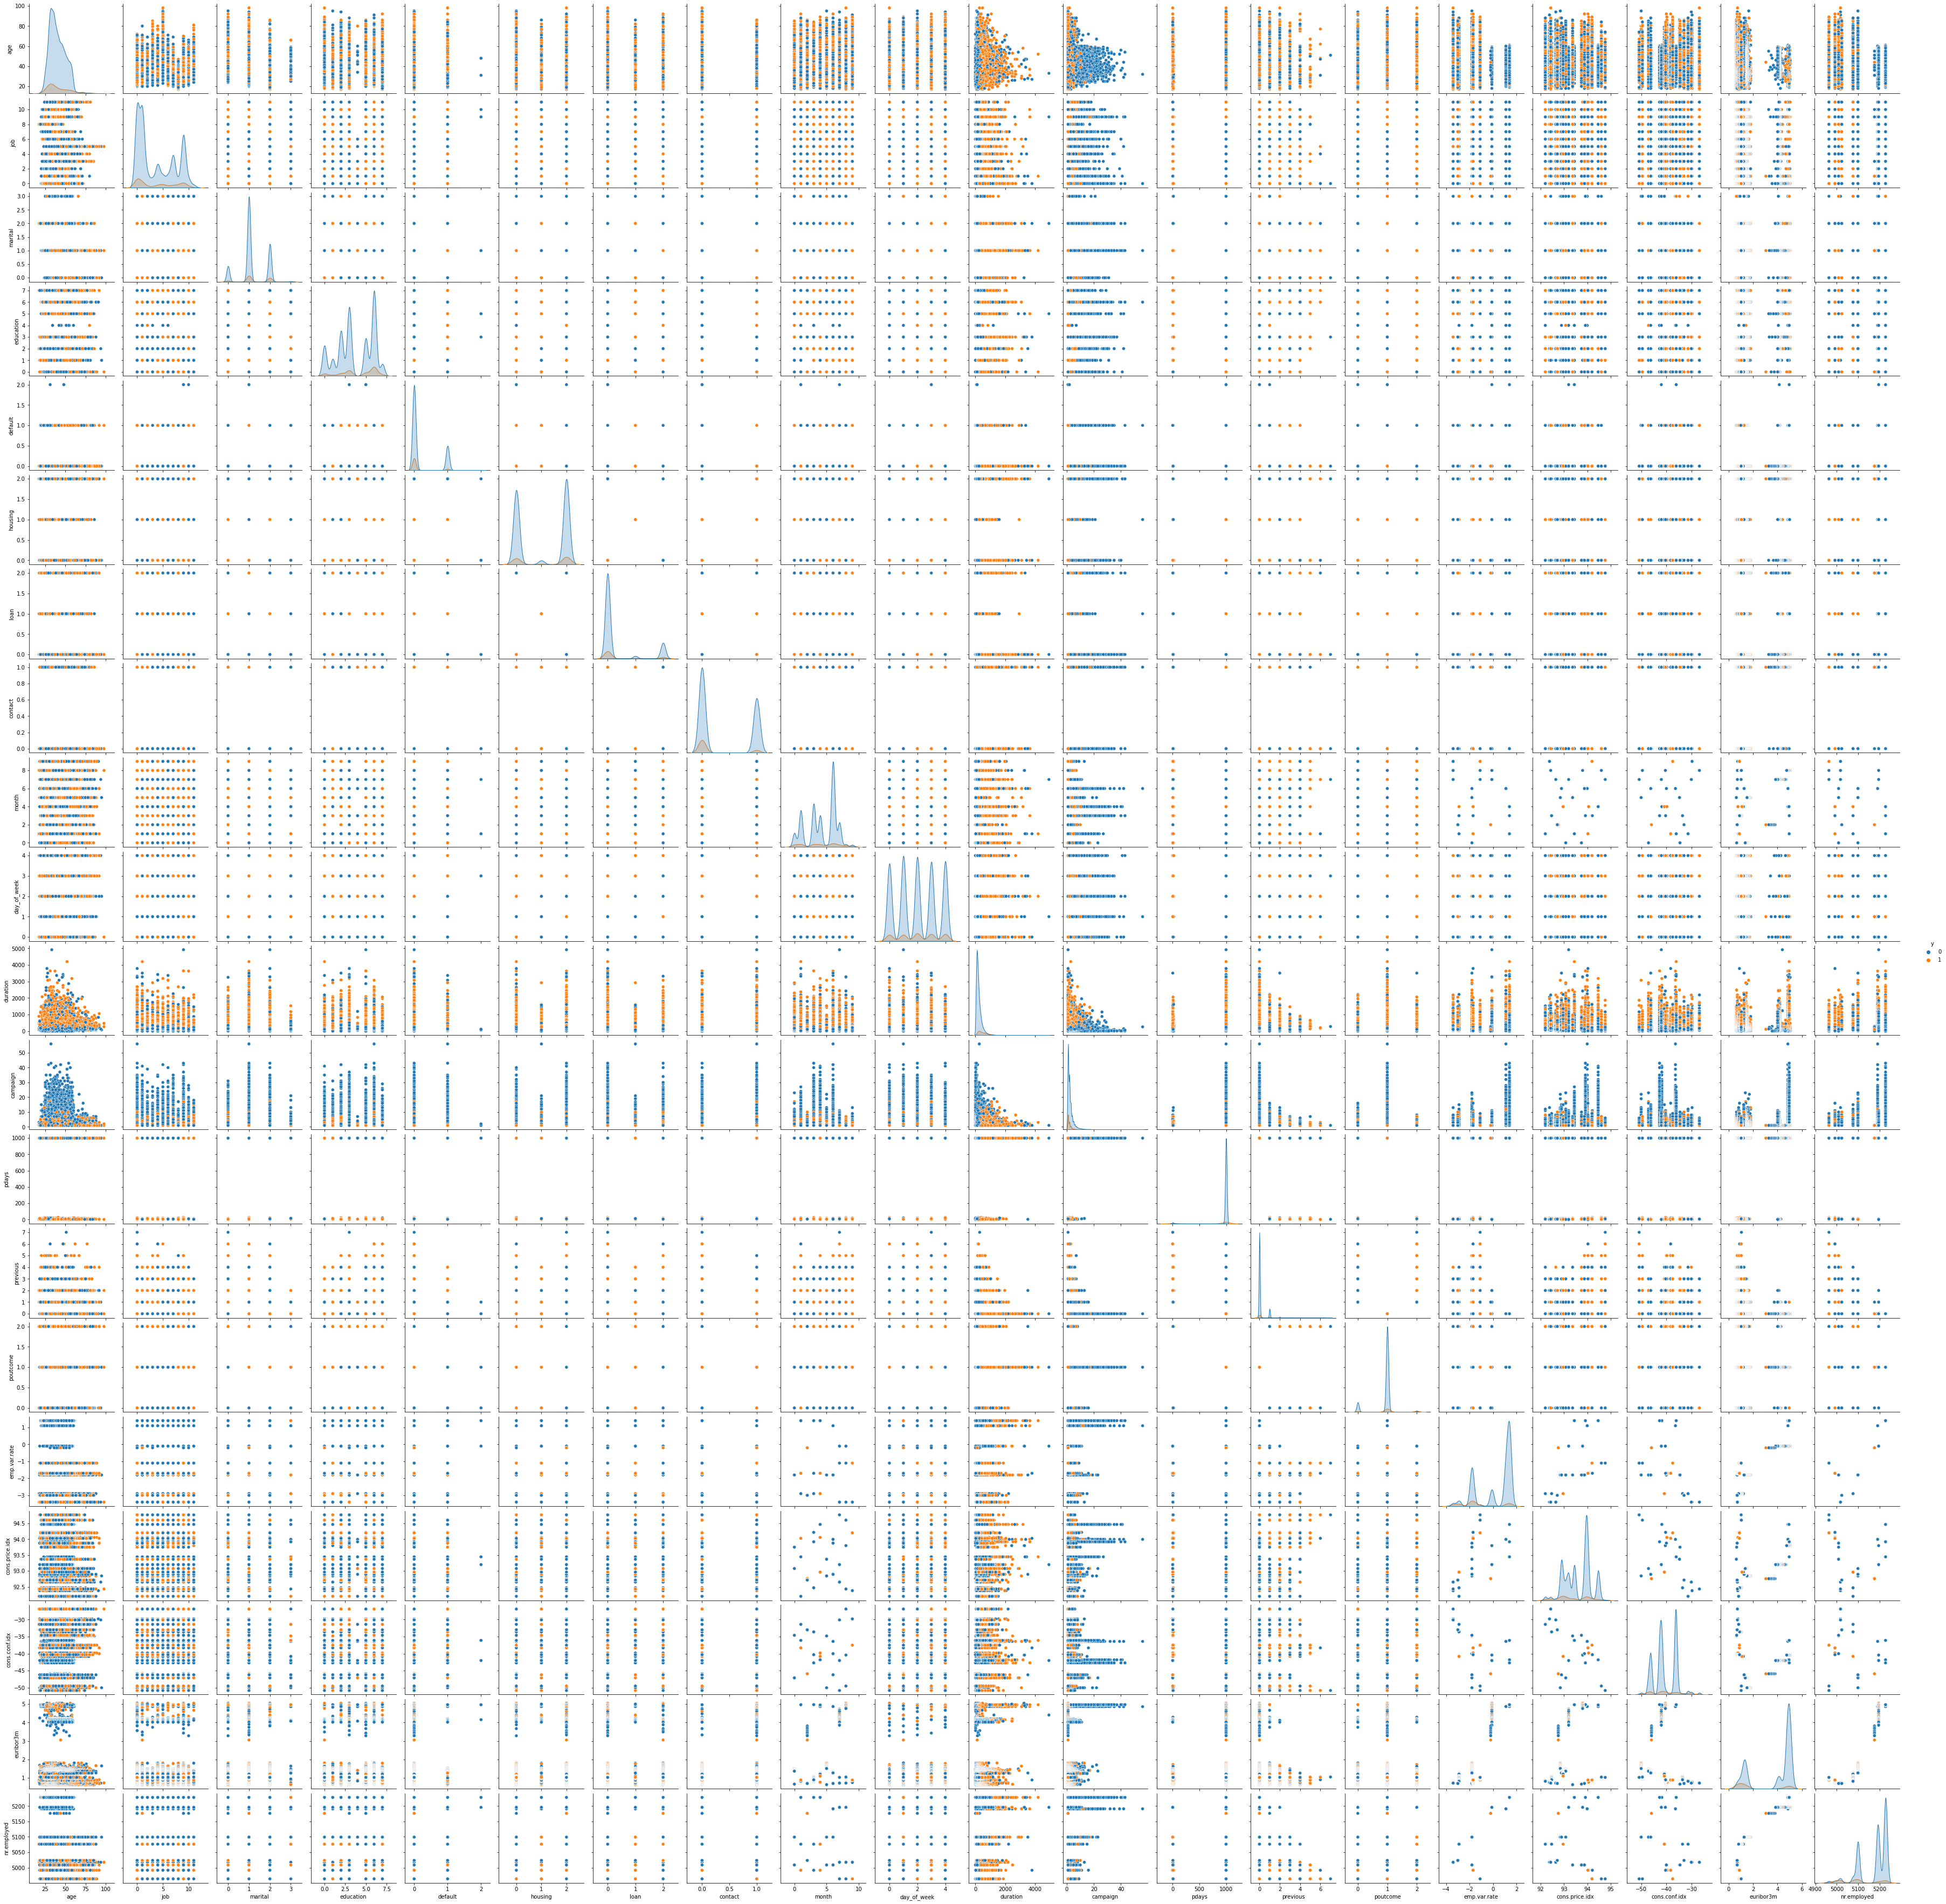

In [ ]:
sns.pairplot(data=df_bank_dataset, hue='y')

## Data preprocessing

In [284]:
df_bank_dataset = df_bank_dataset.drop(columns=['duration'])

In [285]:
df_bank_dataset = df_bank_dataset[df_bank_dataset.marital != 'unknown']
df_bank_dataset = df_bank_dataset[df_bank_dataset.loan != 'unknown']

In [307]:
df_bank_dataset['pdays'] = np.where(df_bank_dataset['pdays'] == 999, 0, 1)

In [329]:
df_bank_dataset = df_bank_dataset.drop(columns=['nr.employed'])

In [330]:
df_bank_dataset = df_bank_dataset.drop(columns=['default'])

## Building the models

In [331]:
# Here we use a different function (from the numpy library) to randomly split the dataset into test/training/validation 
train, test, validate = np.split(df_bank_dataset.sample(frac=1), [int(.6*len(df_bank_dataset)), int(.8*len(df_bank_dataset))])
print (train.shape, test.shape, validate.shape)
# (24712, 21) (8238, 21) (8238, 21)
# (24664, 20) (8222, 20) (8222, 20)

(24664, 18) (8222, 18) (8222, 18)


In [333]:
#Prepare the columns for each split 
X_train = train.drop(columns=['y'])
y_train = train[['y']]

X_test = test.drop(columns=['y'])
y_test = test[['y']]

X_validate = validate.drop(columns=['y'])
y_validate = validate[['y']]

X_train.head()
y_train.head()

age  job  marital  education  housing  loan  contact  month  \
14410   54    4        1          6        0     0        0      3   
24840   43    9        1          5        2     0        1      7   
8128    33    0        1          6        2     0        1      4   
8518    48    0        0          3        0     0        1      4   
16580   29    6        1          5        0     0        0      3   

       day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
14410            1         2      0         0         1           1.4   
24840            3         1      0         0         1          -0.1   
8128             1         8      0         0         1           1.4   
8518             4         3      0         0         1           1.4   
16580            4         1      0         0         1           1.4   

       cons.price.idx  cons.conf.idx  euribor3m  
14410          93.918          -42.7      4.962  
24840          93.200          -42.0      4.153  
8128           94.465          -41.8      4.865  
8518           94.465          -41.8      4.864  
16580          93.918          -42.7      4.963

y
14410  1
24840  0
8128   0
8518   0
16580  0

In [334]:
# Fit RandomForest Classifier
rfChurn = RandomForestClassifier()
rfChurn.fit(X_train, y_train)

RandomForestClassifier()

In [335]:
#Logistic regression 
hrLogReg = LogisticRegression()
#fit the model on the training data
hrLogReg.fit(X_train, y_train)

LogisticRegression()

In [336]:
#Decision tree 
hrDecisionTree = tree.DecisionTreeClassifier()
hrDecisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [337]:
# K-nearest neighbour 
hrKNN = neighbors.KNeighborsClassifier()
hrKNN.fit(X_train,y_train)

KNeighborsClassifier()

In [338]:
# XGBoost 
hrXGB = xgb.XGBClassifier()
hrXGB.fit(X_train,y_train)

XGBClassifier()

In [339]:
# Neural network - Multi-layer Perceptron
hrMLP = MLPClassifier()
hrMLP.fit(X_train,y_train)


MLPClassifier()

In [340]:
y_prob = hrDecisionTree.predict_proba(X_test  )[:, 1]
y_prob
y_prob = hrDecisionTree.predict_proba(X_test  )[:, 0]
y_prob

array([0., 0., 0., ..., 0., 0., 1.])

array([1., 1., 1., ..., 1., 1., 0.])

## Model evaluation

In [341]:
# DS: for clarity show without a loop
classifiers = [ hrMLP, hrXGB, hrKNN, hrDecisionTree, hrLogReg]
evalTable = PrettyTable(['Name', 'Accuracy', 'F1-score', 'ROC AUC score', 'AP score'])
for i in classifiers:
  # Predict the class
  y_predict = i.predict(X_test)
  # Predict probabilities and retrieve just the probabilities for the positive class
  y_prob = i.predict_proba(X_test)[:, 1]
  evalTable.add_row( [ type(i).__name__, (round(i.score(X_test, y_test),3)), 
                      (round(metrics.f1_score(y_test, y_predict),3)), 
                      (round(metrics.roc_auc_score(y_test, y_prob),3)), 
                      (round(metrics.average_precision_score(y_test, y_prob),3)),] )

print(evalTable)

+------------------------+----------+----------+---------------+----------+
|          Name          | Accuracy | F1-score | ROC AUC score | AP score |
+------------------------+----------+----------+---------------+----------+
|     MLPClassifier      |  0.898   |  0.356   |     0.782     |  0.459   |
|     XGBClassifier      |  0.898   |  0.346   |     0.795     |  0.484   |
|  KNeighborsClassifier  |  0.882   |  0.318   |     0.721     |  0.288   |
| DecisionTreeClassifier |  0.841   |  0.333   |     0.626     |   0.19   |
|   LogisticRegression   |  0.896   |  0.289   |     0.758     |  0.416   |
+------------------------+----------+----------+---------------+----------+


In [342]:
#classification report
y_predict = hrLogReg.predict(X_test)
classreport = metrics.classification_report(y_test,y_predict)
print(classreport)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7259
           1       0.74      0.18      0.29       963

    accuracy                           0.90      8222
   macro avg       0.82      0.59      0.62      8222
weighted avg       0.88      0.90      0.87      8222



In [343]:
#confusion matrix 
confMat = metrics.confusion_matrix(y_test,y_predict)
print(confMat)

[[7197   62]
 [ 790  173]]


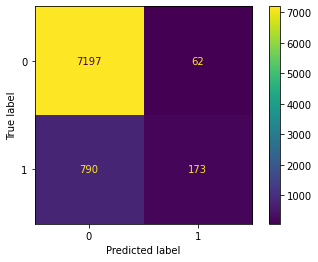

In [344]:
#a more visual confusion matrix
metrics.plot_confusion_matrix(hrLogReg, X_test, y_test, values_format='.0f')

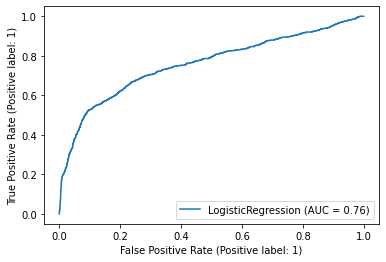

In [345]:
# A single ROC curve
metrics.plot_roc_curve(hrLogReg, X_test, y_test)

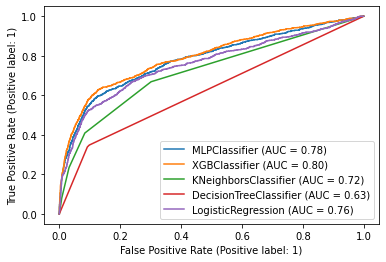

In [346]:
# All ROC curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_roc_curve(i, X_test, y_test, ax=all_axes)


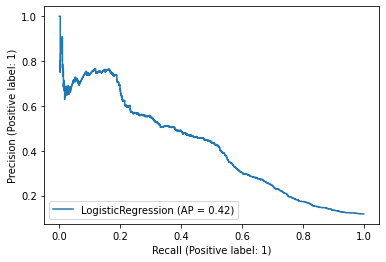

In [347]:
# A single precision-recall curve
metrics.plot_precision_recall_curve(hrLogReg, X_test, y_test)

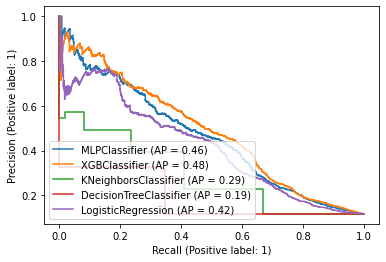

In [348]:
# All precision-recall curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_precision_recall_curve(i, X_test, y_test, ax=all_axes)

In [349]:
lr_probs = rfChurn.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

# calculate accuracy metrices for random forest
lr_auc = roc_auc_score(y_test, lr_probs)
print('Accuracy=%.3f' % (accuracy_score(y_test, rfChurn.predict(X_test))))
print('ROC AUC=%.3f' % (lr_auc))
print('F1 Score=%.3f' % (f1_score(y_test, rfChurn.predict(X_test))))

Accuracy=0.893
ROC AUC=0.773
F1 Score=0.380


## Model explainability 

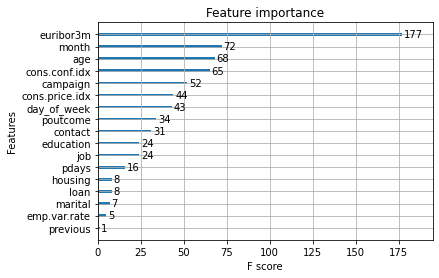

In [350]:
# Built-in function in XGBoost library for input variable (input feature) importance
xgb.plot_importance(hrXGB)

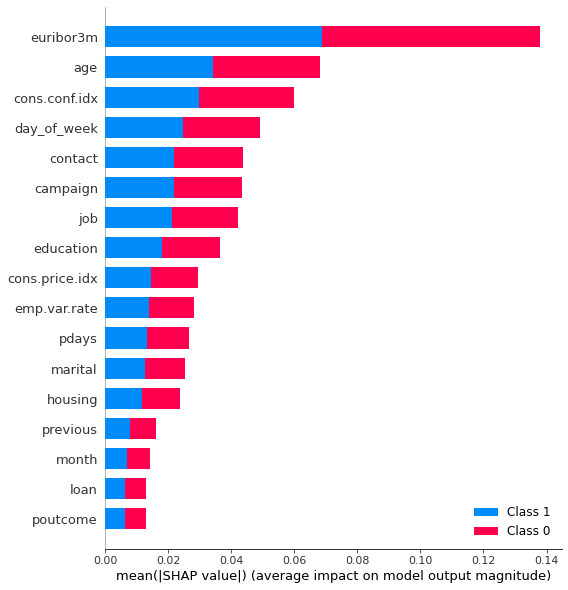

In [351]:
import shap
# Using a SHAP explainer - works for tree-based models only
shapExplainer = shap.TreeExplainer(hrDecisionTree) 
shapExplainer_values = shapExplainer.shap_values(X_train)
shap.summary_plot(shapExplainer_values, X_train)